In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.linear_model import LinearRegression #thư viện để khởi tạo mô hình hồi quy tuyến tính
from sklearn.model_selection import train_test_split #thư viện để chia bộ dữ liệu thành train và test
from sklearn.metrics import mean_squared_error, r2_score #thư viện dùng để đánh giá giữa dữ liệu thực tế và dữ liệu dự đoánD

In [47]:
data = pd.read_excel("Financial Sample xuly (2).xlsx")
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.00,NaN,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.0,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.0,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.4,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,NaN,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [48]:
data.shape

(700, 16)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        698 non-null    object        
 4   Units Sold           689 non-null    float64       
 5   Manufacturing Price  676 non-null    float64       
 6   Sale Price           685 non-null    float64       
 7   Gross Sales          667 non-null    float64       
 8   Discounts            697 non-null    float64       
 9    Sales               689 non-null    float64       
 10  COGS                 684 non-null    float64       
 11  Profit               683 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [50]:
data.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,689.000000,676.000000,685.000000,6.670000e+02,697.000000,6.890000e+02,684.000000,683.000000,700.000000,700.000000
mean,1605.754717,96.261834,118.762044,1.804465e+05,13137.708164,1.684640e+05,144919.700292,23835.100776,7.900000,2013.750000
std,868.501768,108.698173,137.151921,2.521090e+05,23000.333730,2.356283e+05,203118.436681,42267.419809,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.749450e+04,801.000000,1.562085e+04,7468.750000,2770.975000,5.750000,2013.750000
50%,1535.000000,10.000000,20.000000,3.751500e+04,2574.000000,3.517200e+04,22506.250000,9200.640000,9.000000,2014.000000
75%,2227.500000,250.000000,300.000000,2.724500e+05,15400.000000,2.605800e+05,242137.500000,22546.260000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


In [51]:
data.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band           2
Units Sold             11
Manufacturing Price    24
Sale Price             15
Gross Sales            33
Discounts               3
 Sales                 11
COGS                   16
Profit                 17
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [52]:
data.describe().round(2)

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,689.00,676.00,685.00,667.00,697.00,689.00,684.00,683.00,700.00,700.00
mean,1605.75,96.26,118.76,180446.54,13137.71,168464.04,144919.70,23835.10,7.90,2013.75
std,868.50,108.70,137.15,252109.04,23000.33,235628.29,203118.44,42267.42,3.38,0.43
min,200.00,3.00,7.00,1799.00,0.00,1655.08,918.00,-40617.50,1.00,2013.00
25%,905.00,5.00,12.00,17494.50,801.00,15620.85,7468.75,2770.98,5.75,2013.75
50%,1535.00,10.00,20.00,37515.00,2574.00,35172.00,22506.25,9200.64,9.00,2014.00
75%,2227.50,250.00,300.00,272450.00,15400.00,260580.00,242137.50,22546.26,10.25,2014.00
max,4492.50,260.00,350.00,1207500.00,149677.50,1159200.00,950625.00,262200.00,12.00,2014.00


In [53]:
# xem số lượng dư liệu
print(data.shape)
# các tên các cột 
print(data.columns)
# xem kiểu dữ liệu các cột
data.dtypes

(700, 16)
Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
 Sales                        float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

In [54]:
final_data = data.dropna()


In [55]:
final_data.shape

(586, 16)

In [56]:
final_data.isna().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [57]:
data_draw_boxplot_data = final_data.drop(columns=['Segment', 'Country', 'Product', 'Discount Band', 'Date', 'Month Number', 'Month Name', 'Year'], axis=1)
data_draw_boxplot_data

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
0,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0
1,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0
2,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0
4,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0
5,1513.0,3.0,350.0,529550.0,0.0,529550.0,393380.0,136170.0
...,...,...,...,...,...,...,...,...
694,293.0,250.0,20.0,5860.0,879.0,4981.0,2930.0,2051.0
695,2475.0,260.0,300.0,742500.0,111375.0,631125.0,618750.0,12375.0
696,546.0,260.0,300.0,163800.0,24570.0,139230.0,136500.0,2730.0
697,1368.0,5.0,7.0,9576.0,1436.4,8139.6,6840.0,1299.6


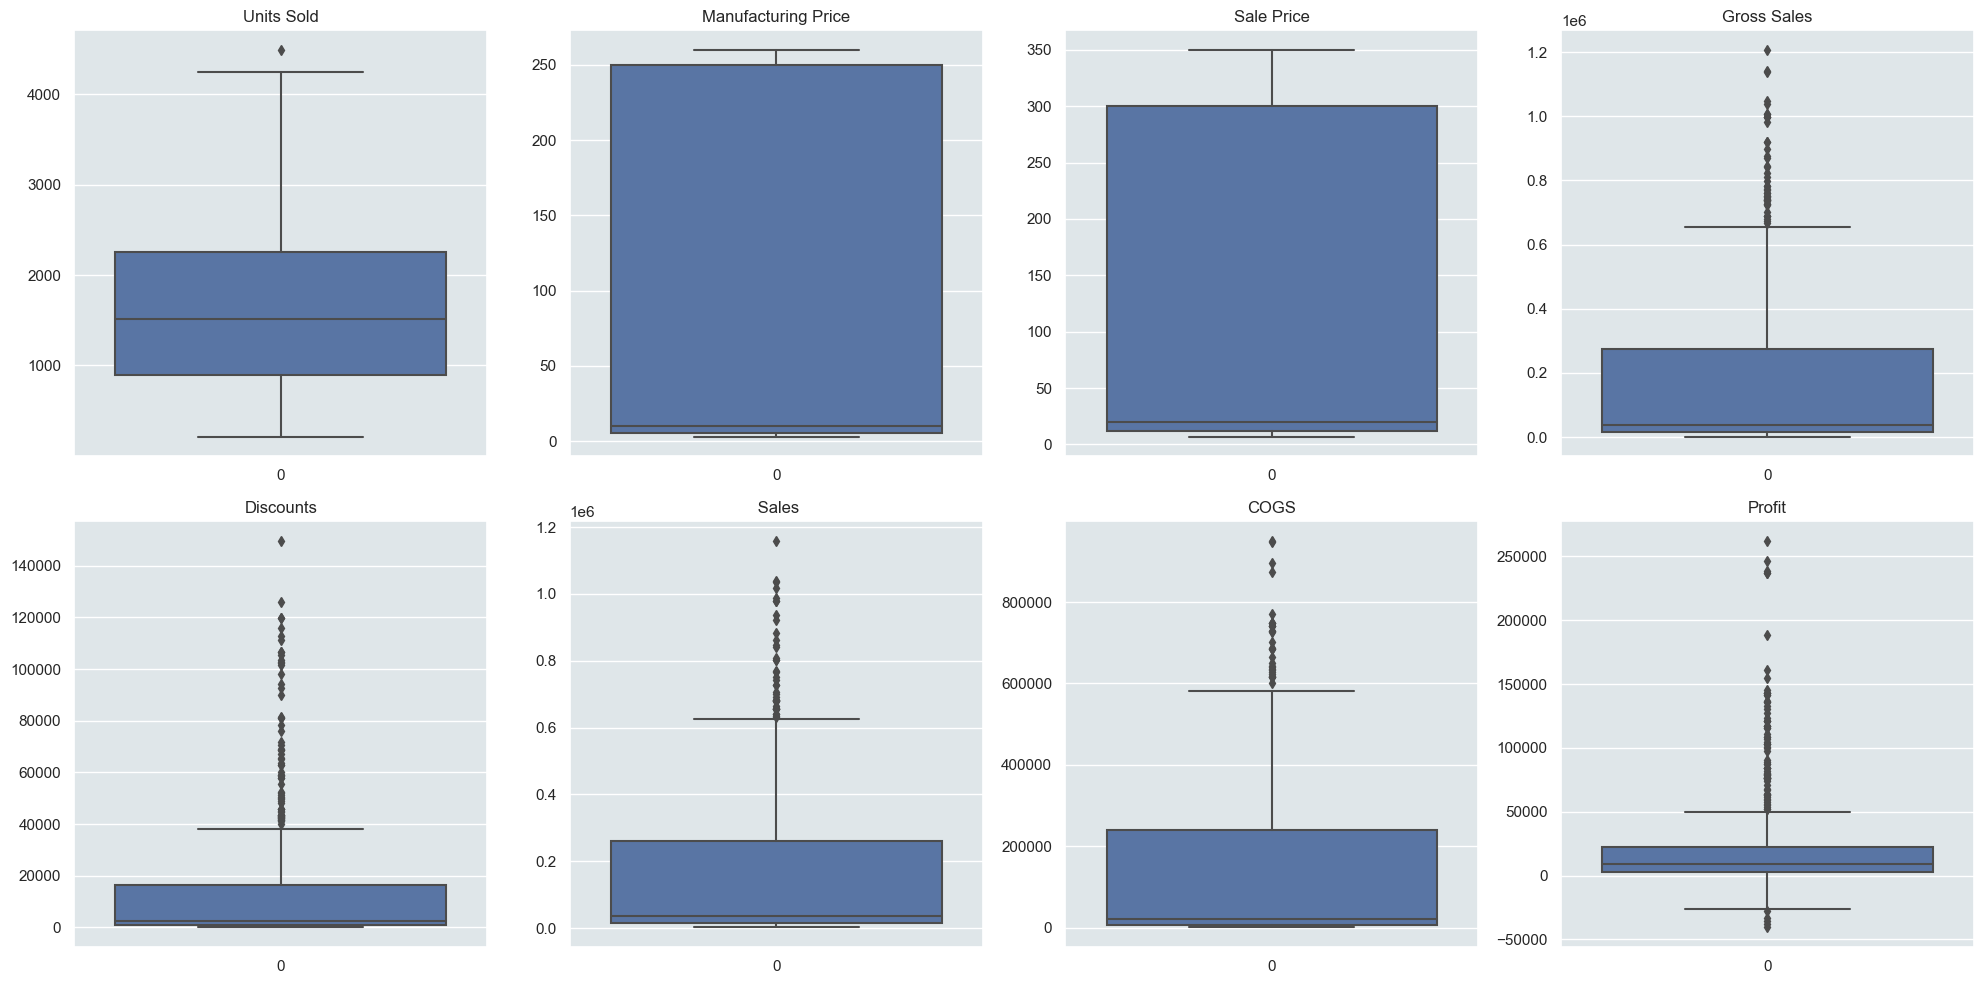

In [58]:
sns.set(rc={'axes.facecolor':'#dfe6e9', 'figure.facecolor':'#fff'})

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for ax, col in zip(axes.flat, data_draw_boxplot_data.columns):
   sns.boxplot(data_draw_boxplot_data[col], ax=ax)
   ax.set_title(col)

plt.tight_layout()
plt.show()

In [59]:
def find_outliers_IQR(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   outliers = data.index[ ((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR))) ]
   return outliers

In [60]:
UnitsSold_outliers = find_outliers_IQR(final_data['Units Sold'])
UnitsSold_outliers

Int64Index([75], dtype='int64')

In [61]:
GrossSales_outliers = find_outliers_IQR(final_data['Gross Sales'])
GrossSales_outliers

Int64Index([ 69,  72,  81, 102, 117, 124, 133, 136, 191, 192, 210, 293, 303,
            351, 353, 374, 380, 397, 405, 413, 414, 423, 429, 436, 460, 472,
            479, 481, 486, 487, 505, 514, 546, 590, 599, 604, 646, 649, 651,
            653, 673, 678, 679, 685, 695],
           dtype='int64')

In [62]:
Discounts_outliers = find_outliers_IQR(final_data['Discounts'])
Discounts_outliers

Int64Index([192, 293, 303, 326, 328, 330, 351, 353, 374, 380, 392, 397, 405,
            406, 413, 414, 423, 424, 429, 430, 432, 436, 437, 458, 460, 472,
            479, 481, 484, 486, 487, 505, 514, 521, 529, 541, 545, 546, 551,
            552, 554, 557, 558, 563, 578, 579, 581, 590, 599, 604, 627, 628,
            645, 646, 649, 651, 653, 656, 657, 659, 667, 673, 678, 679, 685,
            686, 692, 695],
           dtype='int64')

In [63]:
Sales_outliers = find_outliers_IQR(final_data[' Sales'])
Sales_outliers

Int64Index([ 69,  72,  81, 102, 117, 124, 133, 136, 191, 192, 210, 293, 303,
            351, 353, 374, 380, 397, 405, 413, 414, 423, 429, 436, 460, 479,
            486, 487, 505, 514, 546, 590, 599, 604, 649, 651, 653, 673, 679,
            685, 695],
           dtype='int64')

In [64]:
COGS_outliers = find_outliers_IQR(final_data['COGS'])
COGS_outliers

Int64Index([ 72,  81, 102, 117, 124, 133, 191, 192, 351, 353, 374, 397, 405,
            413, 414, 423, 429, 460, 479, 487, 505, 546, 590, 599, 604, 649,
            651, 653, 673, 685, 695],
           dtype='int64')

In [65]:
profit_outliers = find_outliers_IQR(final_data['Profit'])
profit_outliers

Int64Index([  5,  30,  34,  38,  59,  66,  69,  72,  81,  89,  94, 102, 109,
            116, 117, 124, 133, 136, 143, 152, 169, 170, 181, 184, 186, 190,
            191, 192, 208, 210, 231, 233, 239, 244, 280, 284, 290, 293, 300,
            303, 326, 328, 330, 351, 353, 363, 374, 380, 382, 392, 397, 405,
            406, 413, 414, 423, 424, 429, 430, 436, 437, 460, 479, 484, 486,
            487, 514, 529, 551, 554, 557, 579, 590, 599, 646, 657, 659, 667,
            673, 678, 679, 686, 692],
           dtype='int64')

In [66]:
index_list = []

for col in ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit']:
    index_list.extend(find_outliers_IQR(final_data[col]))

In [67]:
index_list

[75,
 69,
 72,
 81,
 102,
 117,
 124,
 133,
 136,
 191,
 192,
 210,
 293,
 303,
 351,
 353,
 374,
 380,
 397,
 405,
 413,
 414,
 423,
 429,
 436,
 460,
 472,
 479,
 481,
 486,
 487,
 505,
 514,
 546,
 590,
 599,
 604,
 646,
 649,
 651,
 653,
 673,
 678,
 679,
 685,
 695,
 192,
 293,
 303,
 326,
 328,
 330,
 351,
 353,
 374,
 380,
 392,
 397,
 405,
 406,
 413,
 414,
 423,
 424,
 429,
 430,
 432,
 436,
 437,
 458,
 460,
 472,
 479,
 481,
 484,
 486,
 487,
 505,
 514,
 521,
 529,
 541,
 545,
 546,
 551,
 552,
 554,
 557,
 558,
 563,
 578,
 579,
 581,
 590,
 599,
 604,
 627,
 628,
 645,
 646,
 649,
 651,
 653,
 656,
 657,
 659,
 667,
 673,
 678,
 679,
 685,
 686,
 692,
 695,
 69,
 72,
 81,
 102,
 117,
 124,
 133,
 136,
 191,
 192,
 210,
 293,
 303,
 351,
 353,
 374,
 380,
 397,
 405,
 413,
 414,
 423,
 429,
 436,
 460,
 479,
 486,
 487,
 505,
 514,
 546,
 590,
 599,
 604,
 649,
 651,
 653,
 673,
 679,
 685,
 695,
 72,
 81,
 102,
 117,
 124,
 133,
 191,
 192,
 351,
 353,
 374,
 397,
 405,
 

In [68]:
final_data.columns.to_list()

['Segment',
 'Country',
 'Product',
 'Discount Band',
 'Units Sold',
 'Manufacturing Price',
 'Sale Price',
 'Gross Sales',
 'Discounts',
 ' Sales',
 'COGS',
 'Profit',
 'Date',
 'Month Number',
 'Month Name',
 'Year']

In [69]:
def remove(data, ls):
    ls = sorted(set(ls))
    data =data.drop(ls)
    return data

In [70]:
data_cleaned = remove(final_data, index_list)
data_cleaned1 = data_cleaned.copy()
data_cleaned.shape

(478, 16)

In [71]:
data_draw_boxplot = data_cleaned.drop(columns=['Segment', 'Country', 'Product', 'Discount Band', 'Date', 'Month Number', 'Month Name', 'Year'], axis=1)
data_draw_boxplot

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
0,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0
1,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0
2,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0
4,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0
6,921.0,5.0,15.0,13815.0,0.0,13815.0,9210.0,4605.0
...,...,...,...,...,...,...,...,...
693,552.0,250.0,125.0,69000.0,10350.0,58650.0,66240.0,-7590.0
694,293.0,250.0,20.0,5860.0,879.0,4981.0,2930.0,2051.0
696,546.0,260.0,300.0,163800.0,24570.0,139230.0,136500.0,2730.0
697,1368.0,5.0,7.0,9576.0,1436.4,8139.6,6840.0,1299.6


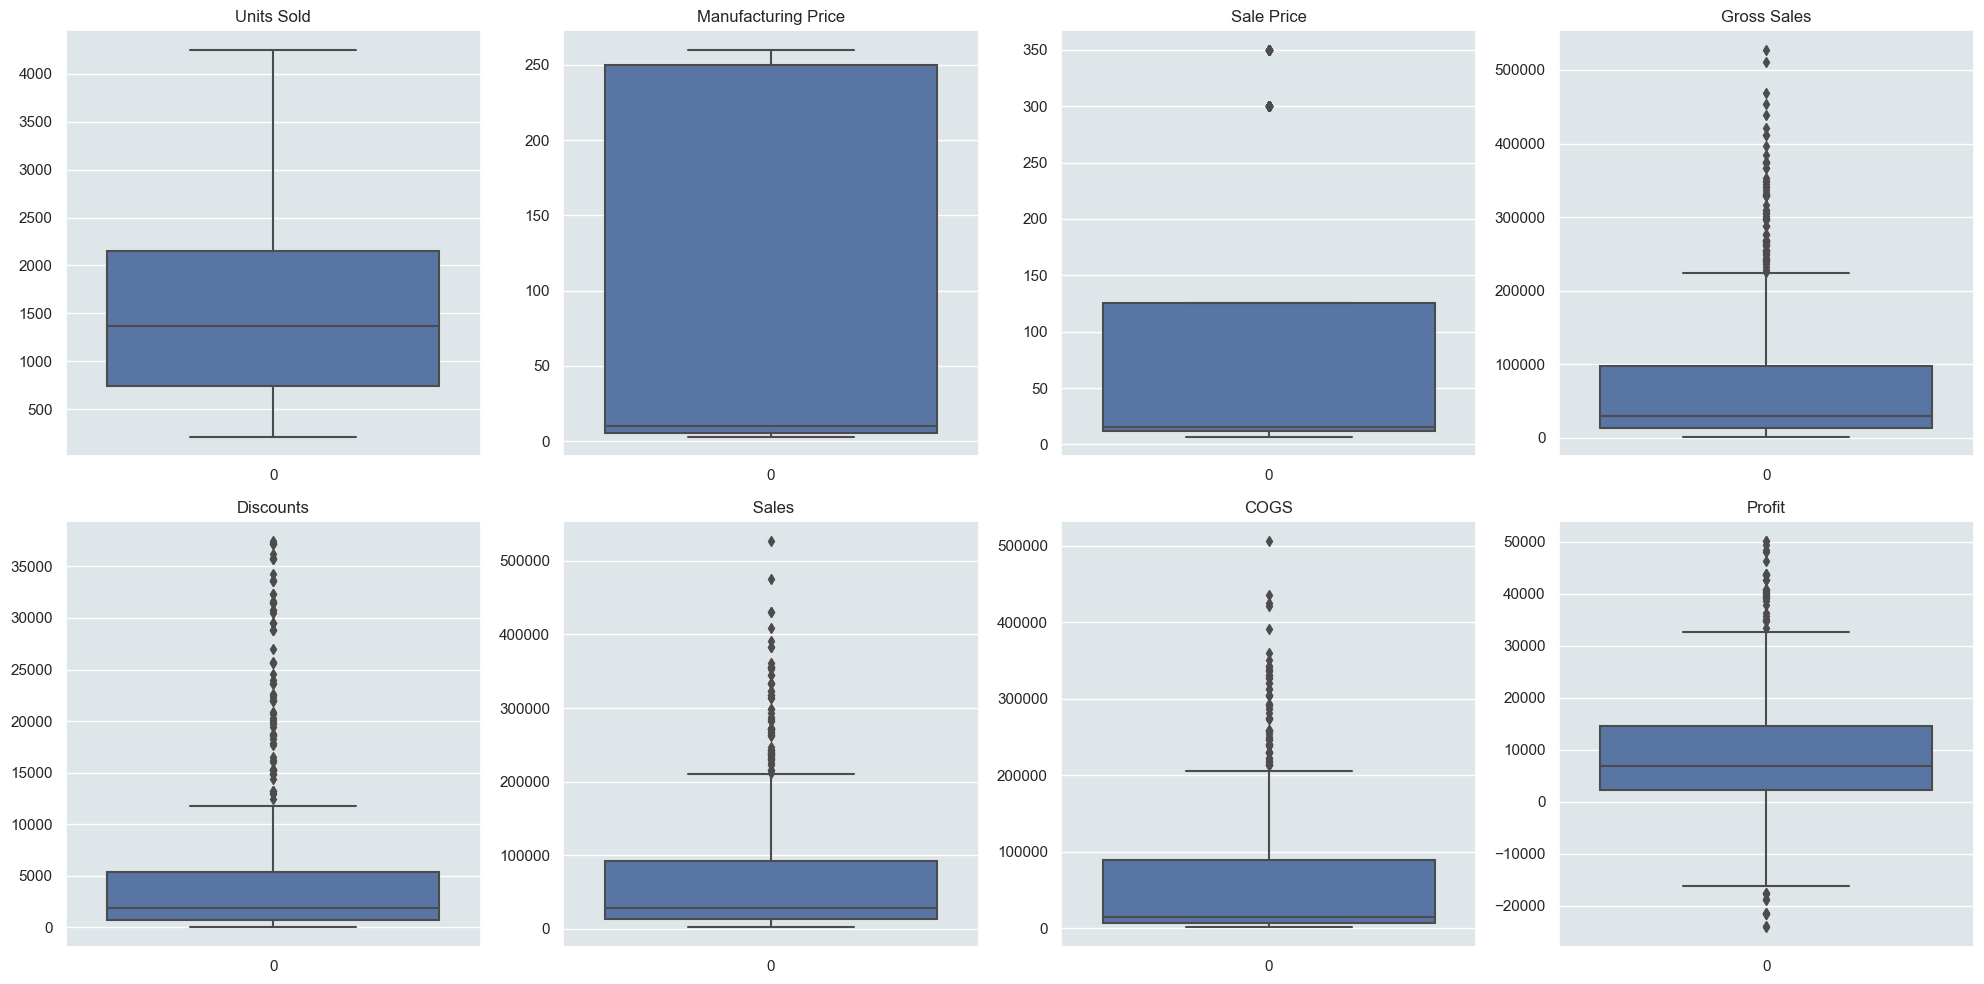

In [72]:
sns.set(rc={'axes.facecolor':'#dfe6e9', 'figure.facecolor':'#fff'})

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for ax, col in zip(axes.flat, data_draw_boxplot.columns):
   sns.boxplot(data_draw_boxplot[col], ax=ax)
   ax.set_title(col)

plt.tight_layout()
plt.show()

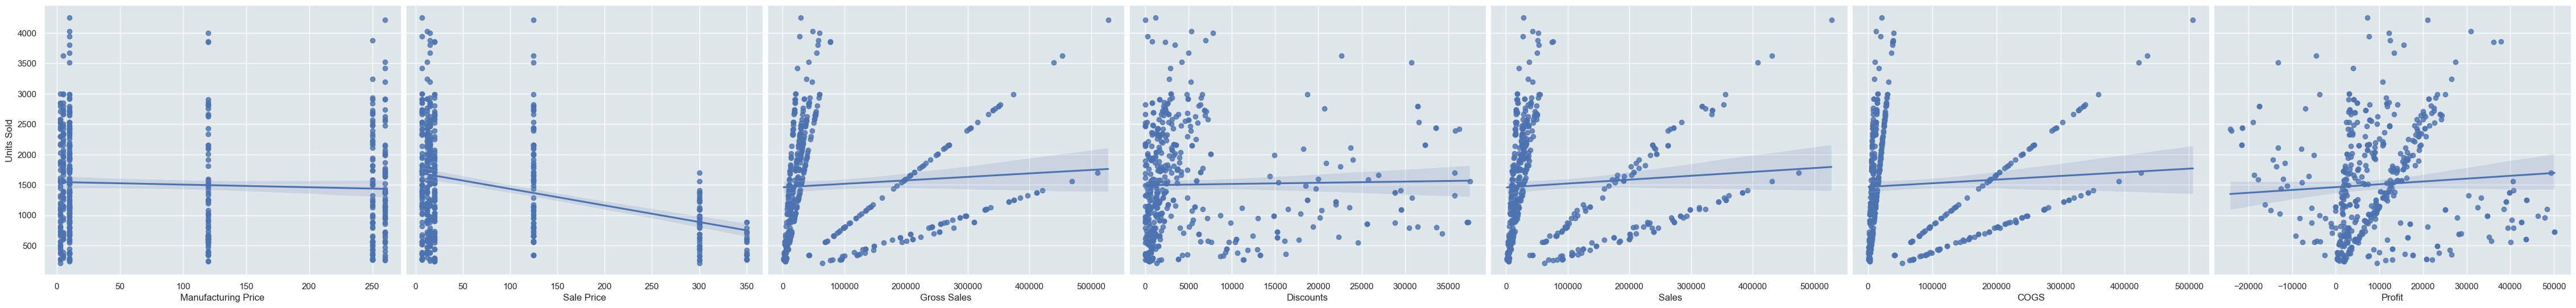

In [73]:
plt.figsize=(20, 20)
sns.pairplot(data_cleaned, x_vars=['Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit'], y_vars=['Units Sold'], kind='reg',height=5.5, aspect=1.2)

In [74]:
sp = data_cleaned['Product'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Paseo,Velo,VTT,Amarilla,Montana,Carretera
Product,140,74,72,67,63,62


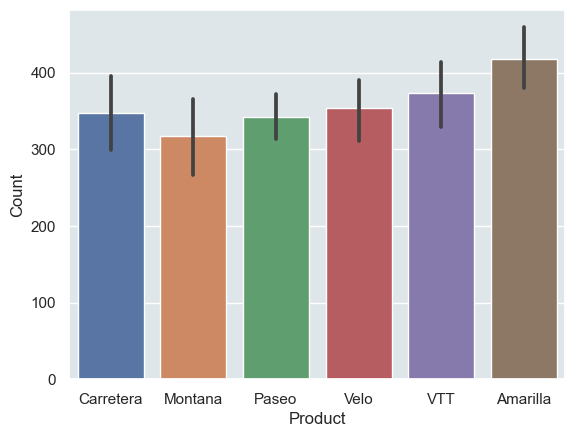

In [75]:
sns.barplot(x=data_cleaned['Product'], y=data_cleaned.index)
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

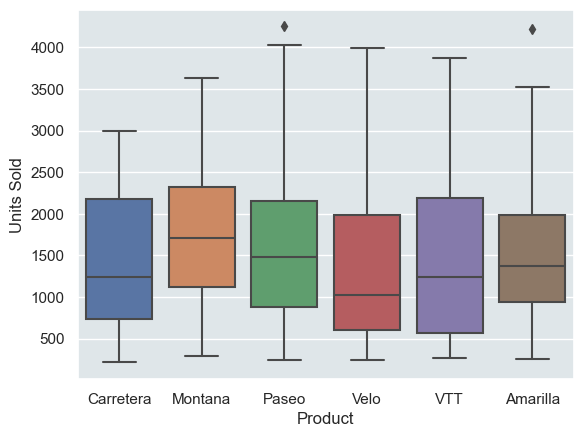

In [76]:
sns.boxplot(x='Product', y='Units Sold', data=data_cleaned)
plt.show()

In [77]:
features = ['Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit']

In [78]:
X = data_cleaned[features]
y = data_cleaned['Units Sold']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [80]:
print('Số giá trị trong từng bộ dữ liệu')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

Số giá trị trong từng bộ dữ liệu
X_train:  (382, 7)
y_train:  (382,)
X_test:  (96, 7)
y_test:  (96,)


In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
model.score(X_test, y_test)

0.4160385596840662

In [83]:
print('Model intercept: ', model.intercept_)
print('Model coefficients: ', model.coef_)

Model intercept:  1431.0719655017242
Model coefficients:  [ 6.10123600e-02 -8.66276626e+00  1.31541623e-02  1.14382157e-02
  1.71594658e-03 -9.84883723e-03  1.15647838e-02]


In [84]:
predicts = model.predict(X_test)

In [85]:
r2_score(y_test, predicts)

0.4160385596840662

In [86]:
unit_test = pd.DataFrame(y_test)
unit_test.reset_index(drop=True, inplace=True)
unit_test.head()

,Units Sold
0,877.0
1,367.0
2,1445.0
3,2420.0
4,293.0


In [87]:
unit_predicted = pd.DataFrame(predicts.round(2), columns=['Predicted unit'])
unit_predicted.head()

,Predicted unit
0,989.66
1,1419.84
2,1692.54
3,1555.69
4,1393.06


Text(0, 0.5, 'Units Sold')

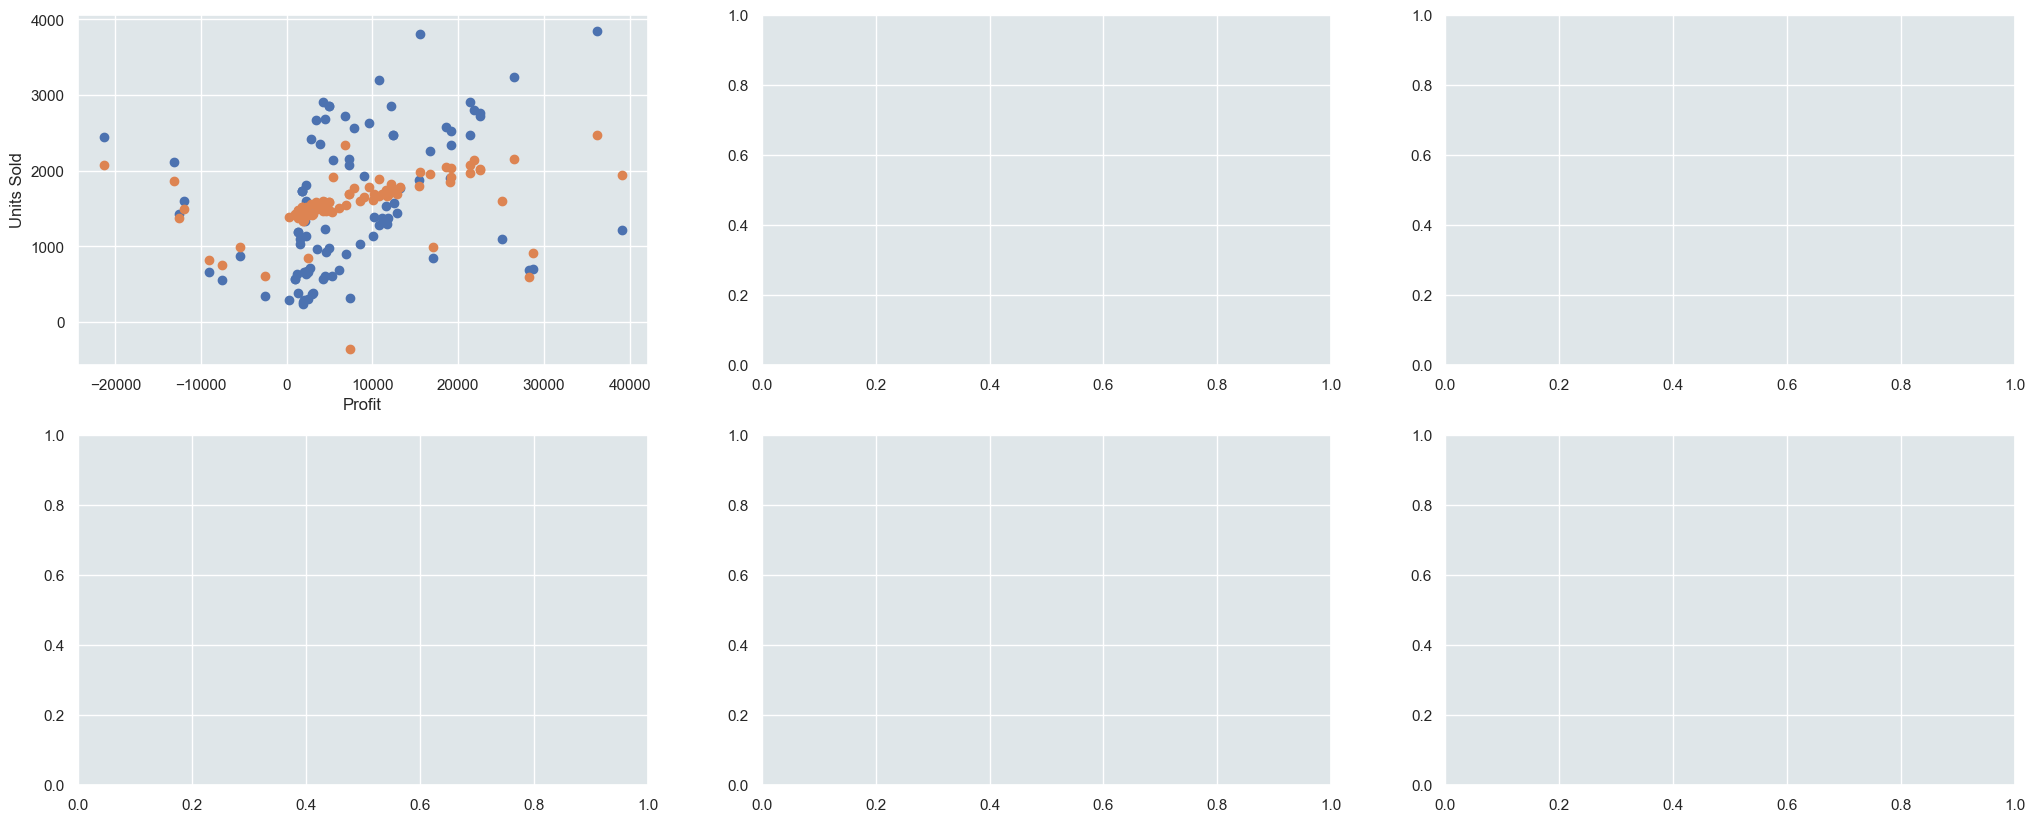

In [88]:
sns.set(rc={'axes.facecolor':'#dfe6e9', 'figure.facecolor':'#fff'})

fig, ax = plt.subplots(2, 3, figsize=(25, 10))
ax[0, 0].scatter(X_test['Profit'], y_test)
ax[0, 0].scatter(X_test['Profit'], predicts)

ax[0, 0].set_xlabel('Profit')
ax[0, 0].set_ylabel('Units Sold')


In [89]:
data_cleaned1.shape

(478, 16)

In [90]:
data_cleaned1.isna().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [91]:
data_cleaned1.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,1504.564854,96.654812,73.960251,80250.458159,5585.677343,74664.780816,65438.925732,9225.855084,7.930962,2013.740586
std,878.596812,108.789644,106.678205,107980.536653,8660.624742,101075.046612,98389.348523,12332.665805,3.345488,0.438772
min,214.000000,3.000000,7.000000,1841.000000,0.000000,1685.600000,918.000000,-24160.000000,1.000000,2013.000000
25%,737.625000,5.000000,12.000000,13512.500000,706.005000,12794.640000,6725.000000,2269.350000,6.000000,2013.000000
50%,1372.000000,10.000000,15.000000,29173.500000,1841.625000,27526.125000,15170.000000,6857.125000,9.000000,2014.000000
75%,2155.000000,250.000000,125.000000,97931.250000,5378.437500,92064.000000,88635.000000,14615.100000,10.000000,2014.000000
max,4251.000000,260.000000,350.000000,527437.500000,37488.000000,527437.500000,506340.000000,50163.000000,12.000000,2014.000000


In [92]:
data_cleaned1

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014
6,Midmarket,Germany,Montana,None,921.0,5.0,15.0,13815.0,0.0,13815.0,9210.0,4605.0,2014-03-01,3,March,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,Enterprise,Germany,VTT,High,552.0,250.0,125.0,69000.0,10350.0,58650.0,66240.0,-7590.0,2014-11-01,11,November,2014
694,Government,France,VTT,High,293.0,250.0,20.0,5860.0,879.0,4981.0,2930.0,2051.0,2014-12-01,12,December,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.0,139230.0,136500.0,2730.0,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.4,8139.6,6840.0,1299.6,2014-02-01,2,February,2014


In [93]:
data_cleaned1["Year"].value_counts()

2014    354
2013    124
Name: Year, dtype: int64

In [94]:
from sklearn.utils import resample #tăng giảm các mẫu
# chia dữ liệu thành các lớp riêng biệt
df_NoCHD = data_cleaned1[data_cleaned1['Year']== 2014]
df_CHD = data_cleaned1[data_cleaned1['Year']==2013] 
# tăng/giảm các mẫu trong mỗi lớp
df_NoCHD_downsampled = resample(df_NoCHD, replace=True, n_samples=1800, random_state=123)
df_CHD_upsampled = resample(df_CHD, replace=True, n_samples=1800, random_state=123)

In [95]:
df2 = pd.concat([df_NoCHD_downsampled, df_CHD_upsampled])
df2['Year'].value_counts()

2014    1800
2013    1800
Name: Year, dtype: int64